In [2]:
# はじめに

# 実際のデータ解析では、何らかの理由でデータが不完全な形でしか得られないことがよくある。
# データが観測されないことを「欠測」もしくは欠損、欠落などという。
# 全部でp種類の変量(測定項目)に対してn個分のデータを観測するとし、xijを第i番目の個体の第j変量の値とする。
# そして、それらを第(i,j)要素とするn*p行列X={xij}の各要素の値が全て得られている時、データは「完全」であるという。
# それに対し、Xのいくつかの要素が得られていない時、データは「不完全」であるという。
# そして、不完全データを何らかの方策によって擬似的に完全な形としたものを「擬似完全」データという。
# 不完全データへの対処法は、データ行列Xに対しどのような分析を行うのかに依存する。

In [3]:
# 不完全データへの対処では、欠測のメカニズムを知ることが重要である。「欠測メカニズム」は、次のように分類される。

# (a)MCAR(Missing Completely At Random)
# 欠測は、欠測データ及び観測データの両方に依存せず、ランダムに生じる

import pandas as pd

mcar_df = pd.DataFrame(
    {
        'class':['A','B','A','A','B','B','A','B'],
        'score':[None, 90, 85, None, 75, None, 60, None],
        'score_perfect':[98, 90, 85, 80, 75, 73, 60, 54]
    }
)
mcar_df # "ランダムに欠損が存在"

,class,score,score_perfect
0,A,NaN,98
1,B,90.0,90
2,A,85.0,85
3,A,NaN,80
4,B,75.0,75
5,B,NaN,73
6,A,60.0,60
7,B,NaN,54


In [4]:
# (b)MAR(Missing At Random)
# 欠測は、観測データに依存して生じるが、欠測データの値によらない

mar_df = pd.DataFrame(
    {
        'class':['A','B','A','A','B','B','A','B'],
        'score':[98, None, 85, 80, None, None, 60, None],
        'score_perfect':[98, 90, 85, 80, 75, 73, 60, 54]
    }
)
mar_df # class Bに欠測が集中

,class,score,score_perfect
0,A,98.0,98
1,B,NaN,90
2,A,85.0,85
3,A,80.0,80
4,B,NaN,75
5,B,NaN,73
6,A,60.0,60
7,B,NaN,54


In [5]:
# (c)MNAR(Missing Not At Random)
# 欠測は、欠測データの値そのものの値に依存して生ずる

mnar_df = pd.DataFrame(
    {
        'class':['A','B','A','A','B','B','A','B'],
        'score':[98, 90, 85, 80, None, None, None, None],
        'score_perfect':[98, 90, 85, 80, 75, 73, 60, 54]
    }
)
mnar_df # scoreが低いほうに欠測が集中

,class,score,score_perfect
0,A,98.0,98
1,B,90.0,90
2,A,85.0,85
3,A,80.0,80
4,B,NaN,75
5,B,NaN,73
6,A,NaN,60
7,B,NaN,54


In [6]:
# 削除法と補完法

# 不完全データから擬似的な完全データを作成するには、欠測のある個体を削除する「削除法」と、
# 欠測箇所に何らかの値を代入する「補完法(代入法)」がある。
# 削除法の中で、多変量データで1箇所でも欠測のある個体は個体ごと削除し、
# 全ての変量が観測されている個体のみを用いる解析法を「CC(Complete Case)解析」という。
# それに対し、例えばある変量の平均値の計算では別の変量の観測・欠測は無関係であり、相関係数の計算では2つの変量さえ
# 両方とも観測されていればよいことから、当該変量の計算では使えるデータは全部使うという「AC(Available Case)解析」がある。
# 欠測値に何らかの値を代入する補完法では、どのような値を欠測箇所に代入するかの選択肢があり、以下がよく用いられる。
# (ⅰ)平均値代入：当該変量の観測データのみから求めた平均値を代入
# (ⅱ)回帰代入：回帰式によって欠測部分を予測して代入
# (ⅲ)Hot Deck法：欠測のあるサンプルと類似のサンプルを同じデータセットから探し出して、その観測データを欠測部分に代入

In [7]:
# 正規分布における推測(1変量正規分布)

# 1変量データでは、欠測メカニズムはMCARかMNARのいずれかとなる。
# 欠測メカニズムがMCARの時は、サイズnのランダムサンプルを得る計画だったが、m個しかデータが得られなかったとしても、
# 観測されたm個のデータのみを用いて統計的な分析を行なっても問題はない。観測データのランダムネスは保たれるからである。
# しかし、欠測が観測されるべき値に依存する場合は、その限りではなく、欠測した理由を加味した分析が必要となる。
# 例えば、ある既知の定数cがあり、cを超えた観測データが得られないような状況である。これはMNARの一つである。
# ここでさらに、cを超えて観測されないデータの個数の情報がある場合とない場合の区別が生じる。
# 全部でn個のデータを観測する計画を立てたが、c以下で実際に観測されたデータはm個であり、
# 観測されなかった個数はn-m個であることがわかっている時、データはcで「打ち切り」になったという。
# 一方、c以下でm個のデータが観測されたがcを超えたデータの個数が不明の時、データは「トランケート」されたという。
# 打ち切りとトランケートの違いは、パラメータを推定する上で大きく影響するので注意する必要がある。

In [8]:
# 正規分布における推測(2変量正規分布)

# 2変量確率変数(X,Y)は2変量正規分布N(μX,μY,σX^2,σY^2,σXY), ρ=σXY/(σX*σY) に従うとし、その同時確率密度関数をf(x,y)とする。
# 欠測メカニズムがMCARであれば、削除法を適用しμYの推定値は観測データの標本平均y_barとし、相関係数ρの推定値は標本相関係数rとすれば良い。 
# 欠測メカニズムがMARの場合には、xを与えた時のyの条件つき推測ではyの欠測は完全にランダムとなることを利用して推測を行う。
# 欠測メカニズムがMNARの場合には、xを与えた時のyの欠測メカニズムをモデル化しておく必要がある。分析は容易ではない。

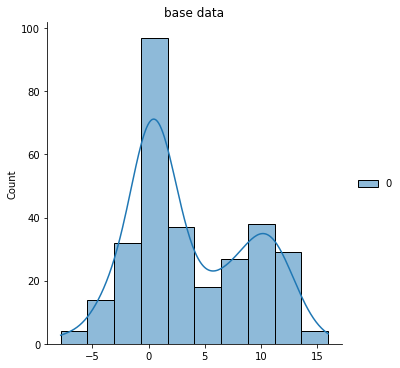

In [9]:
# EMアルゴリズム

# MARの状況で、欠測値のあるデータからパラメータの最尤推定値を求める一般的なアルゴリズムが「EMアルゴリズム」である。
# データがXとYの2つの部類に分かれ、Y=yのみが観測され、Xが欠測したとする。
# (X,Y)の同時確率密度関数をf(x,y;θ)とすると、yの周辺確率密度関数はf(y;θ)=∮f(x,y;θ)dxである。
# これをθの尤度関数として、反復計算により最大化したい。
# EMアルゴリズムでは、以下の「E-ステップ」と「M-ステップ」を交互に繰り返す。
# E-ステップ:θの現在の値をθ*として、θ*のもとで完全データの対数尤度比の条件付き期待値q(θ|θ*)を計算する。
# M-ステップ:q(θ|θ*)をθについて最大化する。
# E-ステップとM-ステップを行うと尤度が必ず非減少となることが示されるので、EMアルゴリズムが収束すれば尤度関数の極大値に到達する。

# EMアルゴリズムを実行
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 学習させたいデータを描画
x1 = np.random.normal(loc=0.5, scale=1 , size =100).reshape(-1,1)
x2 = np.random.normal(loc=10, scale=2 , size =100).reshape(-1,1)
x3 = np.random.normal(loc=0, scale=3 , size =100).reshape(-1,1)
x = np.concatenate([x1 , x2 , x3])
sns.displot(data=x, kde=True)
plt.title("base data")
plt.show()

In [10]:
# 初期パラメータ
mu = np.array([0, 10, 3])
sig = np.array([1, 5, 10])
pi = np.array([0.1, 0.4, 0.5])
print(f"初期パラメータ mu:{mu}, sig:{sig}, pi:{pi}")

# 学習パラメータ
iter_num = 100
e_val = 0.01
LF = 0

for i in range(iter_num):
    # 正規分布の値を取得
    gaus_val = np.exp( - pow((x-mu), 2) /(2*sig) )/np.sqrt(2*np.pi*sig)
    
    # ----- E-ステップ ----- #
    # 事後分布の計算
    gamma_val = pi * gaus_val
    gamma_val = gamma_val/np.sum(gamma_val, axis=1).reshape(len(x),1)
    N_k = np.sum(gamma_val, axis=0)
    N = np.sum(N_k)

    # ----- M-ステップ ----- #
    LF_new = np.sum(np.log(np.sum(pi*gaus_val, axis=1)))
    ch = LF_new - LF
    print(f"LF={LF_new} . change={ch}")

    # e_val以下になるまで尤度を更新
    if np.abs(ch) < e_val:
        print(f"Iteration is finished {i+1} iter. ")
        break
    LF = LF_new

    # パラメータの更新
    mu_k = np.sum(x*gamma_val, axis=0) / N_k
    sig_k = np.sum(gamma_val*pow(x-mu, 2), axis=0) / N_k
    pi_k = N_k / N
    
    pi = pi_k
    mu = mu_k
    sig = sig_k

print(f"更新後パラメータ mu:{mu}, sig:{sig}, pi:{pi}")


初期パラメータ mu:[ 0 10  3], sig:[ 1  5 10], pi:[0.1 0.4 0.5]
LF=-900.5504766018464 . change=-900.5504766018464
LF=-856.9267524116033 . change=43.62372419024314
LF=-852.0038732704289 . change=4.922879141174349
LF=-850.7305268174024 . change=1.2733464530265337
LF=-850.371873146687 . change=0.3586536707153982
LF=-850.258437097441 . change=0.11343604924604733
LF=-850.2092825095706 . change=0.049154587870361865
LF=-850.1795535188369 . change=0.02972899073370172
LF=-850.1578842493991 . change=0.021669269437779803
LF=-850.1409387832949 . change=0.016945466104175466
LF=-850.1273901086564 . change=0.013548674638514058
LF=-850.1164881666249 . change=0.010901942031523504
LF=-850.1077023524456 . change=0.008785814179304907
Iteration is finished 13 iter. 
更新後パラメータ mu:[ 0.26563657 10.25821207  0.90929472], sig:[ 0.50166961  4.34318806 11.97314236], pi:[0.23399525 0.30747205 0.4585327 ]


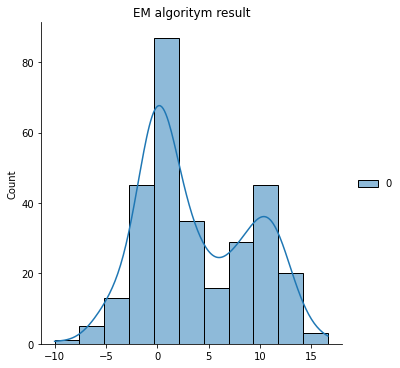

In [11]:
# 推定データを描画
x_pred1 = np.random.normal(loc=mu[0], scale=np.sqrt(sig)[0] , size =int(300*pi[0]) ).reshape(-1,1)
x_pred2 = np.random.normal(loc=mu[1], scale=np.sqrt(sig)[1] , size =int(300*pi[1]) ).reshape(-1,1)
x_pred3 = np.random.normal(loc=mu[2], scale=np.sqrt(sig)[2] , size =int(300*pi[2]) ).reshape(-1,1)
x_pred = np.concatenate([x_pred1, x_pred2, x_pred3])
sns.displot(data=x_pred, kde=True)
plt.title("EM algoritym result")
plt.show() # 学習元データと同じような確率密度分布を描画することができた